# 버스 사고 예측하기

In [1]:
# 모듈로드
import json
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# json파일을 데프로 만들기
labelfold='../data/label/'

def json_df_make(fold,si_fold):
    accident_df=pd.DataFrame()
    path=labelfold+fold+si_fold
    for file in os.listdir(path):
        a_dic=json.load(open(path+file))
        accident_df=pd.concat([accident_df,pd.DataFrame(a_dic['annotations'])],ignore_index=True)
    return accident_df

In [3]:
# json파일에 2명의 사람에 대한 데이터가 모두 행으로 변환되는지 확인용
a_dic=json.load(open('C:/Users/USER/Desktop/com_project/data/label/E/[emergency]accident12_055E/[emergency]accident12_055E_790.json'))
print(len(a_dic))
pd.DataFrame(a_dic['annotations'])

2


,id,bbox,occluded,num_keypoints,keypoints,action,age,disabled,mask,get_on,get_off
0,0,"[418, 673, 933, 1079]",True,16,"[575, 1079, 0, 575, 982, 0, 864, 978, 2, 805, ...",walk,adult,False,False,False,False
1,1,"[253, 826, 825, 1079]",True,16,"[517, 1027, 0, 517, 963, 0, 517, 899, 0, 134, ...",walk,adult,False,False,False,False


In [4]:
accident11_087A_df=json_df_make('A/','[emergency]accident11_087A/')
accident11_087C_df=json_df_make('C/','[emergency]accident11_087C/')
accident11_087E_df=json_df_make('E/','[emergency]accident11_087E/')
accident11_087G_df=json_df_make('G/','[emergency]accident11_087G/')

In [5]:
accident11_087G_df['id']

0     0
1     0
2     0
3     0
4     0
     ..
88    0
89    0
90    0
91    0
92    0
Name: id, Length: 93, dtype: int64

In [6]:
# json파일을 데프로 만들기
labelfold='../data/label/'

def json_df_make(fold,si_fold):
    accident_df=pd.DataFrame()
    folder_li=[]
    path=labelfold+fold+si_fold

    for file in os.listdir(path):
        a_dic=json.load(open(path+file))
        a_dic_ann=a_dic['annotations']
        if len(a_dic_ann)!=0:
            for _ in range(len(a_dic_ann)):
                folder_li.append(fold.split('/')[0])
            accident_df=pd.concat([accident_df,pd.DataFrame(a_dic_ann)],ignore_index=True)
    accident_df['foldname']=folder_li
    
    return accident_df

In [7]:
a=json_df_make('G/','[emergency]accident11_087G/')
a

,id,bbox,occluded,num_keypoints,keypoints,action,age,disabled,mask,get_on,get_off,foldname
0,0,"[1061, 330, 1374, 849]",False,16,"[1092, 771, 2, 1101, 648, 2, 1132, 515, 2, 121...",sit down,adult,False,False,False,False,G
1,0,"[1029, 296, 1365, 842]",False,16,"[1092, 765, 2, 1091, 638, 2, 1149, 505, 2, 123...",sit down,adult,False,False,False,False,G
2,0,"[1030, 272, 1311, 858]",False,16,"[1095, 795, 2, 1092, 639, 2, 1137, 495, 2, 122...",sit down,adult,False,False,False,False,G
3,0,"[1019, 275, 1287, 869]",False,16,"[1093, 804, 2, 1083, 657, 2, 1133, 532, 2, 119...",sit down,adult,False,False,False,False,G
4,0,"[1007, 288, 1282, 878]",False,16,"[1092, 809, 2, 1075, 659, 2, 1120, 524, 2, 119...",sit down,adult,False,False,False,False,G
...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,"[978, 372, 1402, 868]",False,16,"[1102, 792, 2, 1092, 743, 2, 1009, 564, 2, 116...",stand,adult,False,False,False,False,G
89,0,"[967, 373, 1391, 860]",False,16,"[1098, 777, 2, 1095, 730, 2, 1014, 555, 2, 110...",stand,adult,False,False,False,False,G
90,0,"[967, 373, 1391, 860]",False,16,"[1098, 777, 2, 1095, 730, 2, 1014, 555, 2, 110...",stand,adult,False,False,False,False,G
91,0,"[1024, 358, 1380, 858]",False,16,"[1101, 773, 2, 1099, 688, 2, 1085, 538, 2, 118...",stand,adult,False,False,False,False,G


In [8]:
# json파일에 2명의 사람에 대한 데이터가 모두 행으로 변환되는지 확인용
a_dic=json.load(open('C:/Users/USER/Desktop/com_project/data/label/E/[emergency]accident12_055E/[emergency]accident12_055E_790.json'))
pd.DataFrame(a_dic['annotations'])

,id,bbox,occluded,num_keypoints,keypoints,action,age,disabled,mask,get_on,get_off
0,0,"[418, 673, 933, 1079]",True,16,"[575, 1079, 0, 575, 982, 0, 864, 978, 2, 805, ...",walk,adult,False,False,False,False
1,1,"[253, 826, 825, 1079]",True,16,"[517, 1027, 0, 517, 963, 0, 517, 899, 0, 134, ...",walk,adult,False,False,False,False


In [9]:
# 하나의 시나리오에 대한 전체 json파일을 데프로 만들기
# 알파벳은 각각의 카메라를 의미
labelfold='../data/label/'

def json_df_make_li(fold,accident):
    accident_df=pd.DataFrame()
    folder_li=[]
    for f in fold:
        path=labelfold+f+accident+f
        for fi in os.listdir(path):
            accident_dic=json.load(open(path+fi))
            accident_dic_ann=accident_dic['annotations']
            if len(accident_dic_ann)!=0:
                folder_li.append(f.split('/')[0])
            accident_df=pd.concat([accident_df,pd.DataFrame(accident_dic_ann)],ignore_index=True)

    accident_df['foldname']=folder_li # 카메라의 알파벳을 새로운 열로 추가

    return accident_df

In [10]:
# 11시나리오에 대한 json파일을 데프로 만들기
accident11_087_df=json_df_make_li(['A/','C/','E/','G/'],'[emergency]accident11_087')
accident11_088_df=json_df_make_li(['A/','C/','E/','G/'],'[emergency]accident11_088')
accident11_089_df=json_df_make_li(['A/','C/','E/','G/'],'[emergency]accident11_089')

In [11]:
# 11시나리오 전체를 데프로 만들기
accident11_df=pd.concat([accident11_087_df,accident11_088_df,accident11_089_df],ignore_index=True)

In [12]:
# action열을 정수형으로 바꾸어 새로운 열 만들기
action_str=['walk','stand','sit down','grab handle','lay down']
action_int=[]

for i in range(len(accident11_df)):
    if accident11_df.action[i]=='walk':
        action_int.append(0)
    elif accident11_df.action[i]=='stand':
        action_int.append(1)
    elif accident11_df.action[i]=='sit down':
        action_int.append(2)
    elif accident11_df.action[i]=='grab handle':
        action_int.append(3)
    else:
        action_int.append(4)

accident11_df['action_int']=action_int

In [13]:
# x와 y 나누기
x=np.array(list(accident11_df['keypoints'])).reshape(-1,16,3)
y=np.array(list(accident11_df['action_int']))

In [14]:
# 모듈 로딩
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, BatchNormalization, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42,stratify=y)

In [16]:
# 2D 
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_uniform', input_shape=(16,3,1)))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
# model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
# model.add(MaxPooling2D(pool_size=2,padding='same'))
# model.add(BatchNormalization(center=True, scale=True))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=128,
            epochs=40,
            verbose=1,
            validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 1, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 1, 32)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 1, 32)         128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7, 1, 32)          0         
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense (Dense)               (None, 256)               5

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 71ms/step - loss: 2.0879 - accuracy: 0.2521 - val_loss: 9.0188 - val_accuracy: 0.1709
Epoch 2/40
4/4 [==============================] - 0s 14ms/step - loss: 1.5410 - accuracy: 0.3953 - val_loss: 10.4571 - val_accuracy: 0.2735
Epoch 3/40
4/4 [==============================] - 0s 14ms/step - loss: 1.3661 - accuracy: 0.4936 - val_loss: 9.5923 - val_accuracy: 0.2650
Epoch 4/40
4/4 [==============================] - 0s 11ms/step - loss: 1.1951 - accuracy: 0.5513 - val_loss: 6.3863 - val_accuracy: 0.2222
Epoch 5/40
4/4 [==============================] - 0s 16ms/step - loss: 1.1177 - accuracy: 0.5556 - val_loss: 5.2964 - val_accuracy: 0.2991
Epoch 6/40
4/4 [==============================] - 0s 12ms/step - loss: 1.1427 - accuracy: 0.5620 - val_loss: 3.9790 - val_accuracy: 0.3419
Epoch 7/40
4/4 [==============================] - 0s 14ms/step - loss: 1.0298 - accuracy: 0.6282 - val_loss: 4.2268 - val_accuracy: 0.2735
Epoch 8/40
4/4 [=====================

In [17]:
# 
import matplotlib.pyplot as plt

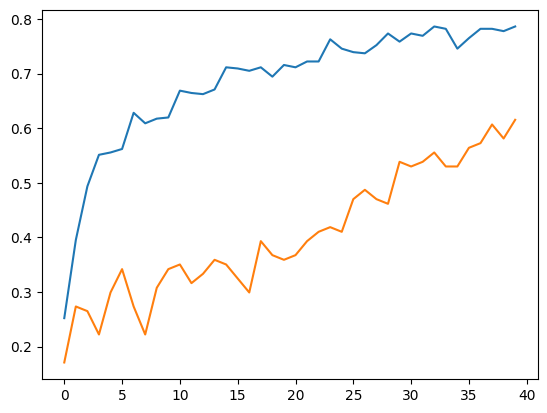

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [21]:
test=np.array([
                1146,
                1045,
                0,
                1329,
                1079,
                0,
                1410,
                1037,
                0,
                1537,
                1063,
                0,
                1714,
                1063,
                0,
                1215,
                1073,
                0,
                1448,
                1050,
                0,
                1623,
                1031,
                2,
                1698,
                880,
                2,
                1773,
                800,
                2,
                1230,
                1030,
                0,
                1287,
                953,
                0,
                1799,
                1016,
                2,
                1484,
                909,
                2,
                1369,
                1023,
                2,
                1707,
                1052,
                0
            ]).reshape(-1,16,3)
action_str[np.argmax(history.model.predict(test))]

1/1 [==============================] - 0s 42ms/step


'walk'

# lay down
[
                1172,
                1075,
                2,
                1349,
                1062,
                0,
                1362,
                1021,
                2,
                1404,
                1075,
                2,
                1363,
                1043,
                0,
                1363,
                1081,
                0,
                1395,
                1047,
                2,
                1497,
                1040,
                2,
                1594,
                1027,
                2,
                1626,
                1019,
                2,
                1458,
                968,
                2,
                1445,
                921,
                1,
                1537,
                943,
                2,
                1554,
                951,
                0,
                1458,
                951,
                0,
                1320,
                986,
                0
            ][
                1172,
                1075,
                2,
                1349,
                1062,
                0,
                1362,
                1021,
                2,
                1404,
                1075,
                2,
                1363,
                1043,
                0,
                1363,
                1081,
                0,
                1395,
                1047,
                2,
                1497,
                1040,
                2,
                1594,
                1027,
                2,
                1626,
                1019,
                2,
                1458,
                968,
                2,
                1445,
                921,
                1,
                1537,
                943,
                2,
                1554,
                951,
                0,
                1458,
                951,
                0,
                1320,
                986,
                0
            ]

# walk

[
                1146,
                1045,
                0,
                1329,
                1079,
                0,
                1410,
                1037,
                0,
                1537,
                1063,
                0,
                1714,
                1063,
                0,
                1215,
                1073,
                0,
                1448,
                1050,
                0,
                1623,
                1031,
                2,
                1698,
                880,
                2,
                1773,
                800,
                2,
                1230,
                1030,
                0,
                1287,
                953,
                0,
                1799,
                1016,
                2,
                1484,
                909,
                2,
                1369,
                1023,
                2,
                1707,
                1052,
                0
            ]

# grad handle

[
                1359,
                1116,
                0,
                1359,
                993,
                0,
                1437,
                989,
                2,
                1579,
                988,
                2,
                1603,
                993,
                0,
                1603,
                1116,
                0,
                1517,
                993,
                2,
                1605,
                805,
                1,
                1642,
                680,
                2,
                1692,
                597,
                2,
                1472,
                906,
                1,
                1409,
                856,
                2,
                1506,
                663,
                2,
                1692,
                670,
                1,
                1722,
                792,
                2,
                1782,
                785,
                2
            ]